In [20]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
type(train_images)

numpy.ndarray

In [21]:
train_images.dtype

dtype('uint8')

In [22]:
train_images.ndim

3

In [23]:
train_images.shape
# 60000 images, each 28x28 pixels

(60000, 28, 28)

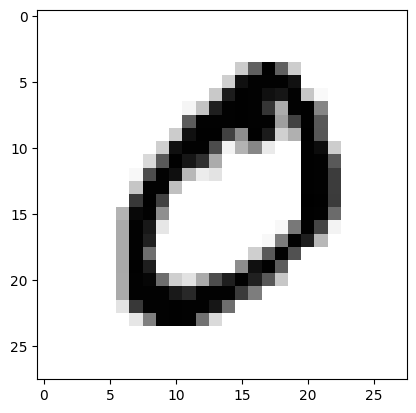

In [24]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
# train_images[1,:,:] is the 2nd image in the dataset, :,: means all 28 pixels in the image
# cmap = plt.cm.binary is to display the image in black and white
plt.show()

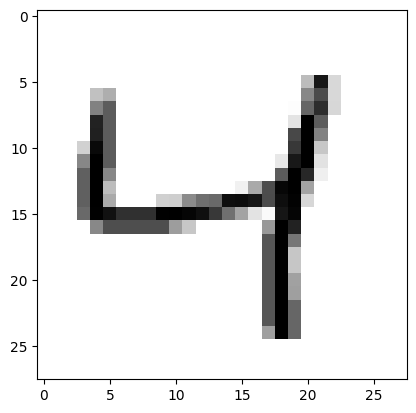

In [25]:
import matplotlib.pyplot as plt
plt.imshow(train_images[2,:,:], cmap = plt.cm.binary)
# train_images[2,:,:] is the 3rd image in the dataset, :,: means all 28 pixels in the image
# cmap = plt.cm.binary is to display the image in black and white
plt.show()

In [26]:
type(train_labels)

numpy.ndarray

In [27]:
train_labels.shape
# 60000 labels

(60000,)

In [28]:
train_labels[1], train_labels[2]
# labels exactly matches the images

(0, 4)

In [29]:
type(test_images)

numpy.ndarray

In [30]:
test_images.shape
# 10000 images, each 28x28 pixels

(10000, 28, 28)

In [31]:
test_images.ndim

3

In [32]:
test_labels.shape

(10000,)

In [33]:
train_images = train_images.reshape((60000,28*28)) # reshaping the images to 1D array: 60000 of 1x784
train_images = train_images.astype("float32")/255 # divide by 255 to normalize the pixel values to 0-1
train_images.shape

(60000, 784)

In [34]:
test_images = test_images.reshape((10000,28*28)) # reshaping the images to 1D array: 10000 of 1x784
test_images = test_images.astype("float32")/255 # divide by 255 to normalize the pixel values to 0-1
test_images.shape

(10000, 784)

In [35]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels) # converting the labels to one-hot encoding
test_labels = to_categorical(test_labels) # converting the labels to one-hot encoding
train_labels[1],train_labels[2] # 0 to [1,0,0,0,0,0,0,0,0,0] and 4 to [0,0,0,0,1,0,0,0,0,0]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

In [36]:
from keras import models
from keras import layers
model = models.Sequential() # sequential means the layers are stacked on top of each other, one input tensor and one output tensor

model.add(layers.Dense(512, activation = "relu", input_shape = (28*28, ))) # 512 neurons, dense: fully connected, activation function: relu
model.add(layers.Dense(10, activation = "softmax")) # 10 neurons, dense: fully connected, activation function: softmax
model.summary()
# number of biases = number of neurons in the layer
# number of weights = number of neurons in the previous layer * number of neurons in the current layer (if fully connected)
# param = weights + biases = (28*28)*512+512 =  784*512+512 = 401920 parameters in the first layer
# param = weights + biases = 512*10+10 = 5130 parameters in the second layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer= "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
model.fit(train_images,
         train_labels,
         validation_split=0.2,
         epochs = 5,
         batch_size = 128)
# epoch = 5 means the model will go through the training data 5 times
# batch_size = 128 means the model will take 128 images at a time to train
# step = 60000/128 = 469 steps per epoch
# loss function: categorical_crossentropy is used for multi-class classification
# optimizer: rmsprop is used for gradient descent
# metrics: accuracy is used to evaluate the model

Epoch 1/5
375/375 [==============================] - 4s 9ms/step - loss: 0.2911 - accuracy: 0.9170 - val_loss: 0.1481 - val_accuracy: 0.9591
Epoch 2/5
375/375 [==============================] - 3s 8ms/step - loss: 0.1219 - accuracy: 0.9653 - val_loss: 0.1061 - val_accuracy: 0.9668
Epoch 3/5
375/375 [==============================] - 3s 9ms/step - loss: 0.0799 - accuracy: 0.9769 - val_loss: 0.0959 - val_accuracy: 0.9707
Epoch 4/5
375/375 [==============================] - 3s 8ms/step - loss: 0.0577 - accuracy: 0.9833 - val_loss: 0.0910 - val_accuracy: 0.9724
Epoch 5/5
375/375 [==============================] - 3s 9ms/step - loss: 0.0429 - accuracy: 0.9880 - val_loss: 0.0780 - val_accuracy: 0.9770


In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
# 313 steps per epoch = 10000/32 (batch_size = 32 by default)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9788
test_loss :  0.06995207816362381 
test_acc :  0.9787999987602234
